## Code to generate a baseline on the MNIST cluttered dataset.

In [15]:
%matplotlib inline

import numpy as np
np.random.seed(1337)  # for reproducibility
import matplotlib.pyplot as plt
from scipy.misc import imresize
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.utils import np_utils, generic_utils
from keras.optimizers import Adam, SGD

import keras.backend as K
import os
os.environ["CUDA_VISIBLE_DEVICES"]="4"

batch_size = 128
nb_classes = 10
nb_epoch = 12

DIM = 60
mnist_cluttered = "./../datasets/mnist_cluttered_60x60_6distortions.npz"

In [16]:
import sys
sys.path.append('../')
from spatial_transformer import SpatialTransformer

In [17]:
data = np.load(mnist_cluttered)
X_train, y_train = data['x_train'], np.argmax(data['y_train'], axis=-1)
print("X_train sample:", X_train[0])
X_valid, y_valid = data['x_valid'], np.argmax(data['y_valid'], axis=-1)
X_test, y_test = data['x_test'], np.argmax(data['y_test'], axis=-1)
# reshape for convolutions
X_train = X_train.reshape((X_train.shape[0], DIM, DIM, 1))
X_valid = X_valid.reshape((X_valid.shape[0], DIM, DIM, 1))
X_test = X_test.reshape((X_test.shape[0], DIM, DIM, 1))
#one hot
y_train = np_utils.to_categorical(y_train, nb_classes)
y_valid = np_utils.to_categorical(y_valid, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

print("Train samples: {}".format(X_train.shape))
print("Validation samples: {}".format(X_valid.shape))
print("Test samples: {}".format(X_test.shape))
print("sample output:",y_train)
print("output shape:", y_train.shape)
input_shape =  np.squeeze(X_train.shape[1:])
input_shape = (60,60,1)
print("Input shape:",input_shape)

('X_train sample:', array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32))
Train samples: (50000, 60, 60, 1)
Validation samples: (10000, 60, 60, 1)
Test samples: (10000, 60, 60, 1)
('sample output:', array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.]]))
('output shape:', (50000, 10))
('Input shape:', (60, 60, 1))


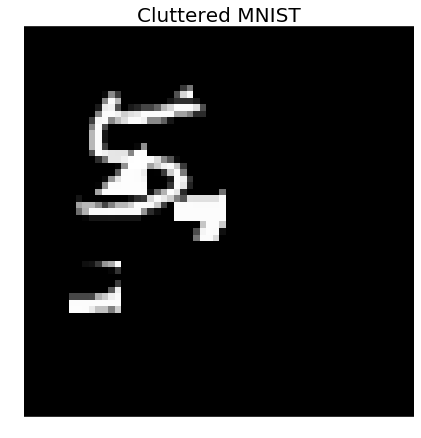

In [18]:
plt.figure(figsize=(7,7))
plt.imshow(X_train[101].reshape(DIM, DIM), cmap='gray', interpolation='none')
plt.title('Cluttered MNIST', fontsize=20)
plt.axis('off')
plt.show()

## Old model 

In [19]:
# model = Sequential()

# # model.add(SpatialTransformer(localization_net=locnet,
# #                              output_size=(30,30), input_shape=input_shape))
# model.add(Convolution2D(32, (3, 3), padding='same', input_shape=input_shape))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Convolution2D(32, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Convolution2D(32, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Convolution2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(256))
# model.add(Activation('relu'))

# model.add(Dense(nb_classes))
# model.add(Activation('softmax'))

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [20]:
from keras.callbacks import History 
history = History()

In [21]:
model = Sequential()

model.add(Convolution2D(64, (9, 9), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(64, (1, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

model.add(Convolution2D(64, (7, 7), padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, (1, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))
model.add(Dropout(rate=0.4))

model.add(Convolution2D(64, (5, 5), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(64, (1, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))
model.add(Dropout(rate=0.4))

model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, (1, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 60, 60, 64)        5248      
_________________________________________________________________
activation_19 (Activation)   (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 60, 60, 64)        4160      
_________________________________________________________________
activation_20 (Activation)   (None, 60, 60, 64)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 30, 30, 64)        200768    
_________________________________________________________________
activation_21 (Activation)   (None, 30, 30, 64)        0         
__________

In [ ]:
nb_epochs = 40 # you probably want to go longer than this
batch_size = 100

model.fit(X_train, y_train,
          epochs=nb_epochs,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          callbacks=[history],
          verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
29100/50000 [================>.............] - ETA: 43s - loss: 0.2376 - acc: 0.9281

In [ ]:
# summarize history for accuracy
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()